Interactively test the spherical Voronoi algorithm implementation proposed by Ross Hemsley at PyData London 2015

In [25]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import voronoi_utility
import numpy as np
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#pre-requisite step: generate the random coordinates on the sphere
prng = np.random.RandomState(117)
random_coordinate_array = voronoi_utility.generate_random_array_spherical_generators(1000,1.0,prng)

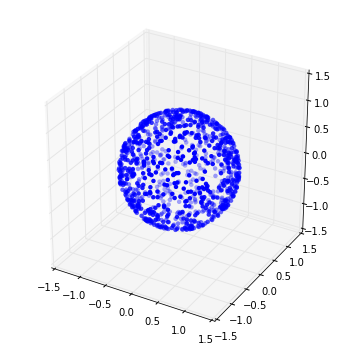

In [27]:
#confirm reasonable distribution of points on the unit sphere
fig_initial_sphere = plt.figure()
ax = fig_initial_sphere.add_subplot('111', projection = '3d')
ax.scatter(random_coordinate_array[...,0], random_coordinate_array[...,1], random_coordinate_array[...,2], c = 'blue', edgecolor = 'none')
fig_initial_sphere.set_size_inches(6,6)

In [28]:
#step 1: place an additional generator at the centre of the sphere (the origin of the coordinate system)
random_coordinate_array = np.concatenate((random_coordinate_array, np.zeros((1,3))))
random_coordinate_array[-5:,...]

array([[ 0.04779068,  0.18088762, -0.98234196],
       [ 0.65068594, -0.05710244,  0.75719688],
       [ 0.30483201, -0.91611846,  0.2603928 ],
       [-0.04647746, -0.2515145 ,  0.96673694],
       [ 0.        ,  0.        ,  0.        ]])

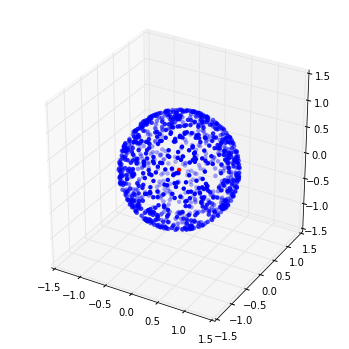

In [31]:
#confirm appropriate coordinates for the center (in red)
fig_additional_generator = plt.figure()
ax = fig_additional_generator.add_subplot('111', projection = '3d')
ax.scatter(random_coordinate_array[:-1,0], random_coordinate_array[:-1,1], random_coordinate_array[:-1,2], c = 'blue', edgecolor = 'none')
ax.scatter(random_coordinate_array[-1,0], random_coordinate_array[-1,1], random_coordinate_array[-1,2], c = 'red', edgecolor = 'none')
fig_additional_generator.set_size_inches(6,6)

In [32]:
#step 2: perform 3D Delaunay triangulation on data set that includes the extra generator
tri = sp.spatial.Delaunay(random_coordinate_array)

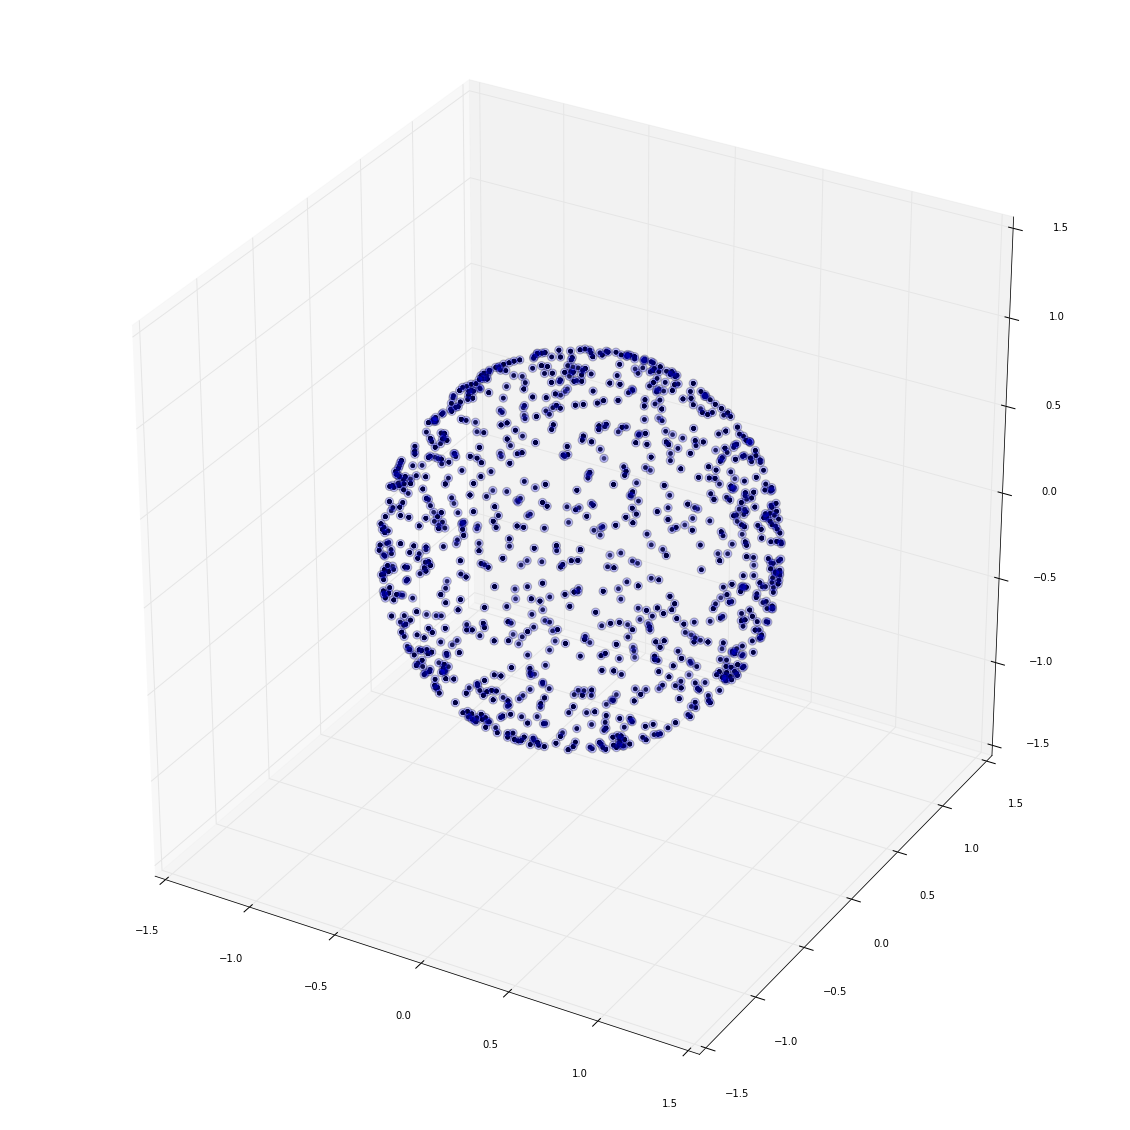

In [45]:
#confirm reasonable-looking tetrahedralization of sphere
fig_initial_tetrahedralization = plt.figure()
ax = fig_initial_tetrahedralization.add_subplot('111', projection = '3d')
for simplex in tri.points[tri.simplices]:
    ax.scatter(simplex[...,0], simplex[...,1], simplex[...,2], c = 'k', edgecolor = 'none')
ax.scatter(random_coordinate_array[...,0], random_coordinate_array[...,1], random_coordinate_array[...,2], c = 'blue', edgecolor = 'none', s = 70, alpha = 0.25)
fig_initial_tetrahedralization.set_size_inches(20,20)

Although connecting the tetrahedra in a non-intersecting fashion would probably be a bit more work, the superposition of generators on the tetrahedral vertices is sensible given that each generator should indeed be a vertex in the 3D tetrahedralization.

In [60]:
#step 3a: produce circumspheres / circumcenters of tetrahedra from 3D Delaunay
#based on some rough testing, it turns out that ALL simplices (tetrahedra) have one vertex at the origin [I think Ross was trying to explain this to me at PyData London 2015]
#the unit normal to the outer Delaunay facet (on sphere surface) is a Voronoi vertex (as in my previous algorithm)
#because each tetrahedron contains the origin as a vertex, the circumcenter is located halfway between the origin and the Voronoi vertex [othwerise the other vertices would illegally be located inside the circumsphere]
#furthermore, if we exclude the tetrahedral vertex at the origin, the remaining three vertices form a face (triangle) on the sphere surface, the circumcenter of which may be projected to the sphere surface to produce the coordinates of the corresponding Voronoi vertex

import circumcircle

list_circumcenter_coordinates = []
for simplex in tri.points[tri.simplices]: #iterate over tetrahedra
    triangle_coordinate_array = simplex[:-1,...] #remove the origin to obtain the surface triangle
    circumcenter_coordinate = circumcircle.calc_circumcenter_3D(triangle_coordinate_array)
    list_circumcenter_coordinates.append(circumcenter_coordinate)
    
circumcenter_coordinate_array = np.array(list_circumcenter_coordinates)    
    

In [61]:
circumcenter_coordinate_array.shape

(1996, 3)